Week 10: Neural Nets Regression

In [ ]:
# # Basic setup for early stopping criteria
# patience = 5  # epochs to wait after no improvement
# delta = 0.01  # minimum change in the monitored metric
# best_val_loss = float("inf")  # best validation loss to compare against
# no_improvement_count = 0  # count of epochs with no improvement

# class EarlyStopping:
#     def __init__(self, patience=5, delta=0, verbose=False):
#         self.patience = patience
#         self.delta = delta
#         self.verbose = verbose
#         self.best_loss = None
#         self.no_improvement_count = 0
#         self.stop_training = False
    
#     def check_early_stop(self, val_loss):
#         if self.best_loss is None or val_loss < self.best_loss - self.delta:
#             self.best_loss = val_loss
#             self.no_improvement_count = 0
#         else:
#             self.no_improvement_count += 1
#             if self.no_improvement_count >= self.patience:
#                 self.stop_training = True
#                 if self.verbose:
#                     print("Stopping early as no improvement has been observed.")

# # Initialize early stopping
# early_stopping = EarlyStopping(patience=patience, delta=delta, verbose=True)



In [ ]:

# import matplotlib.pyplot as plt
# import numpy as np

# import torch
# import torch.nn as nn
# import torch.optim as optim

# # Define the model with specified layer dimensions
# class TransformationModel(nn.Module):
#     def __init__(self):
#         super(TransformationModel, self).__init__()
        
#         # Initial translation vector (to center rotation)
#         self.initial_shift = nn.Parameter(torch.tensor([0.0, 0.0], dtype=torch.float32))
        
#         # Rotation and transformation layers with specified dimensions
#         self.rotation_matrix1 = nn.Linear(2, 8, bias=False)  # (2, 8) transformation
#         self.final_shift1 = nn.Parameter(torch.zeros(8, dtype=torch.float32))  # (8,) shift vector

#         self.rotation_matrix2 = nn.Linear(8, 8, bias=False)  # (8, 8) transformation
#         self.final_shift2 = nn.Parameter(torch.zeros(8, dtype=torch.float32))  # (8,) shift vector

#         self.rotation_matrix3 = nn.Linear(8, 2, bias=False)  # (8, 2) transformation
#         self.final_shift3 = nn.Parameter(torch.zeros(2, dtype=torch.float32))  # (2,) shift vector

#     def forward(self, x):
#         # Apply initial shift to move rotation center
#         x_shifted = x + self.initial_shift
        
#         # First transformation layer
#         x_rotated1 = self.rotation_matrix1(x_shifted)
#         x_transformed1 = x_rotated1 + self.final_shift1  # (8,)

#         # Second transformation layer
#         x_rotated2 = self.rotation_matrix2(x_transformed1)
#         x_transformed2 = x_rotated2 + self.final_shift2  # (8,)

#         # Third transformation layer
#         x_rotated3 = self.rotation_matrix3(x_transformed2)
#         x_transformed_final = x_rotated3 + self.final_shift3  # (2,)

#         return x_transformed_final

# # Define the input and output points
# input_points = torch.tensor([[2.5, 1.0],
#                              [3.0, 1.0],
#                              [3.5, 1.0],
#                              [2.5, 1.2],
#                              [3.0, 1.2],
#                              [3.5, 1.7]], dtype=torch.float32)

# output_points = torch.tensor([[2.433, 1.25],
#                               [2.866, 1.50],
#                               [3.299, 1.75],
#                               [2.333, 1.4232],
#                               [2.766, 1.6732],
#                               [2.949, 2.3562]], dtype=torch.float32)

# # Instantiate the model, loss function, and optimizer
# model = TransformationModel()
# loss_fn = nn.MSELoss()
# optimizer = optim.SGD(model.parameters(), lr=0.01)

# # # Training loop
# # num_epochs = 10000
# # for epoch in range(num_epochs):
# #     # Forward pass
# #     y_pred = model(input_points)
    
# #     # Compute loss
# #     loss = loss_fn(y_pred, output_points)
    
# #     # Backward pass and optimization
# #     optimizer.zero_grad()
# #     loss.backward()
# #     optimizer.step()
    
# #     # Print loss every 1000 epochs
# #     if epoch % 1000 == 0:
# #         print(f'Epoch {epoch}, Loss: {loss.item()}')

# num_epochs = 100

# for epoch in range(num_epochs):
#     train_loss = 0.0
#     val_loss = 0.0

#     # Training phase
#     model.train()
#     for data, target in train_loader:
#         optimizer.zero_grad()
#         output = model(data)
#         loss = criterion(output, target)
#         loss.backward()
#         optimizer.step()
#         train_loss += loss.item()
    
#     # Validation phase
#     model.eval()
#     with torch.no_grad():
#         for data, target in val_loader:
#             output = model(data)
#             loss = criterion(output, target)
#             val_loss += loss.item()
    
#     # Average validation loss
#     val_loss /= len(val_loader)

#     # Check early stopping condition
#     early_stopping.check_early_stop(val_loss)
    
#     if early_stopping.stop_training:
#         print(f"Early stopping at epoch {epoch}")
#         break

# # Print the learned parameters
# print("Learned initial shift:", model.initial_shift.data)
# print("Learned rotation matrix1:", model.rotation_matrix1.weight.data)
# print("Learned final shift1:", model.final_shift1.data)
# print("Learned rotation matrix2:", model.rotation_matrix2.weight.data)
# print("Learned final shift2:", model.final_shift2.data)
# print("Learned rotation matrix3:", model.rotation_matrix3.weight.data)
# print("Learned final shift3:", model.final_shift3.data)


In [ ]:
# # Apply multiple successive transformations and store each result
# num_iterations = 5  # Number of successive transformations to visualize
# colors = plt.cm.viridis(np.linspace(0, 1, num_iterations))  # Generate a color gradient

# # Convert input points to numpy array for initial plotting
# input_points_np = input_points.numpy()
# input_x, input_y = input_points_np[:, 0], input_points_np[:, 1]

# # Plot the original input points
# plt.scatter(input_x, input_y, color='blue', label='Original Points')

# # Apply the transformation iteratively and plot each set
# current_points = input_points.clone()  # Start with the original input points

# for i in range(num_iterations):
#     # Apply the trained model to get the next transformation
#     transformed_points = model(current_points).detach().numpy()
    
#     # Separate x and y coordinates for transformed points
#     transformed_x, transformed_y = transformed_points[:, 0], transformed_points[:, 1]
    
#     # Plot the transformed points with a new color each iteration
#     plt.scatter(transformed_x, transformed_y, color=colors[i])
    
#     # Set the current points to the latest transformed points for the next iteration
#     current_points = torch.tensor(transformed_points, dtype=torch.float32)

# # Labeling the plot
# plt.xlabel('X Coordinate')
# plt.ylabel('Y Coordinate')
# plt.title('Successive Transformations of Points')
# plt.xlim(-2, 4)
# plt.ylim(-2, 4)
# plt.legend()
# plt.grid(True)

# # Show the plot
# plt.show()

5.1 Noisy Lennard-Jones-Gauss data

In [13]:
# create some noise LJ data

def LJ_pot(r,eps=0.155,sigma=3.16):
    V = 4*eps*((sigma/r)**12-(sigma/r)**6)
    return V


4683.220618100399


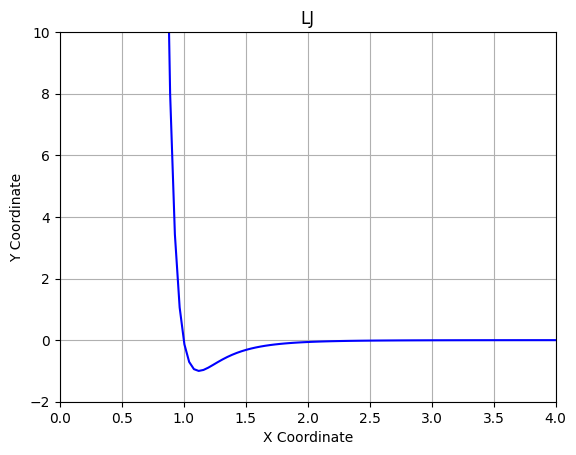

In [20]:
import numpy as np
import matplotlib.pyplot as plt

print(LJ_pot(1.5))
xs = np.linspace(0.2,4,100)
ys = LJ_pot(xs,1,1)

# Plot the original input points
plt.plot(xs, ys, color='blue')

# Labeling the plot
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.title('LJ')
plt.xlim(0,4)
plt.ylim(-2,10)
plt.grid(True)

# Show the plot
plt.show()